This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
from scipy.stats import shapiro
from scipy.stats import normaltest

import warnings
warnings.simplefilter("ignore")

In [3]:
data=pd.read_excel('housing_price.xlsx')
df=data.copy()

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id'], axis=1, inplace=True)

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

date
['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '20150407T000000' '20140827T000000'
 '20150223T000000' '20141210T000000' '20140828

In [7]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [8]:
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].mean())

In [9]:
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].mean())

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

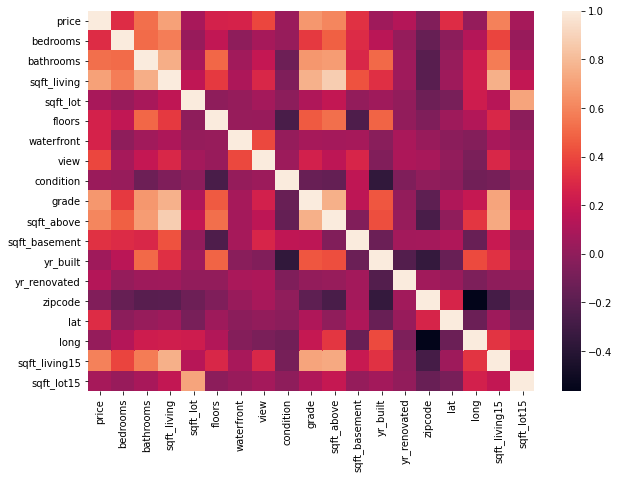

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

In [12]:
#sns.pairplot(df)

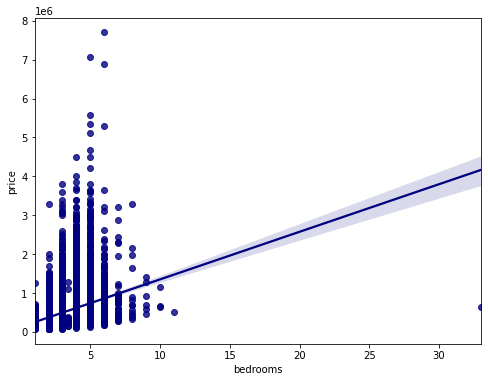

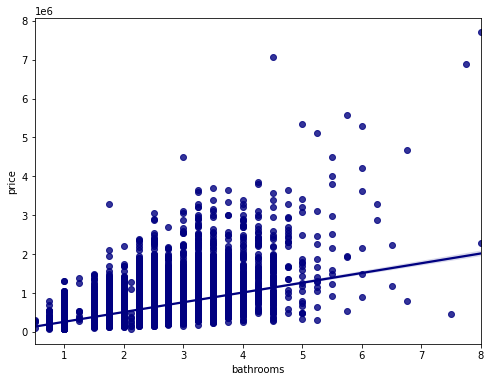

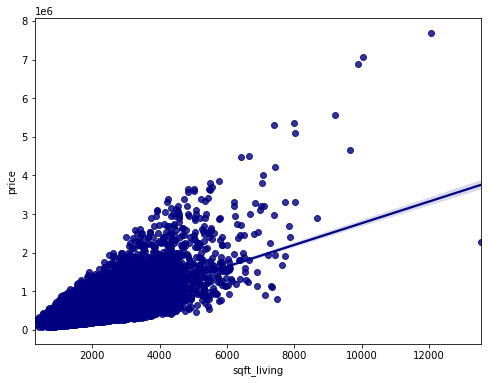

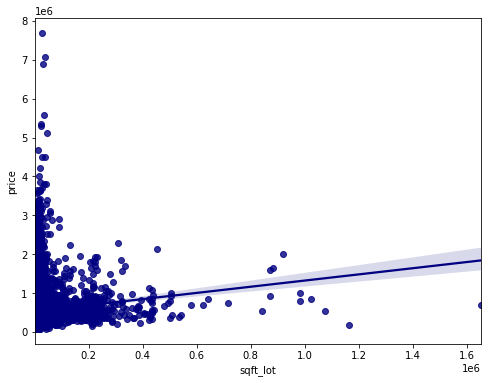

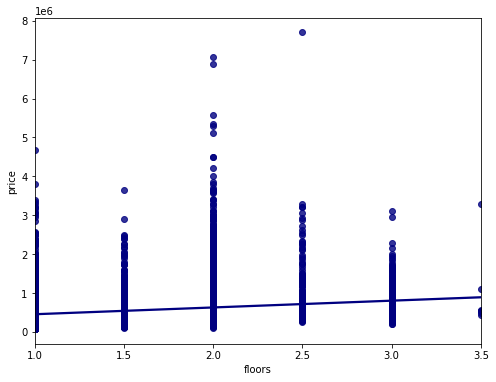

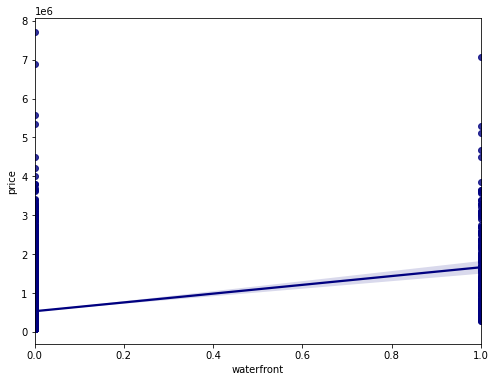

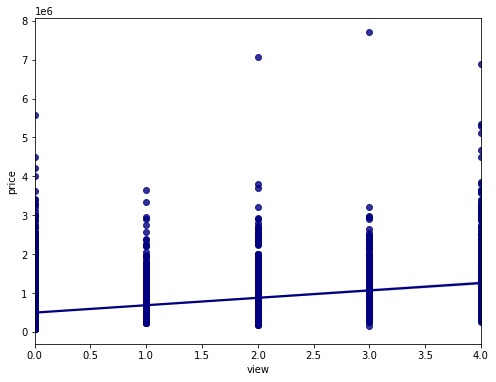

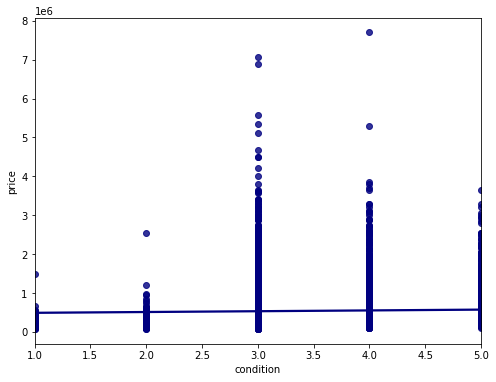

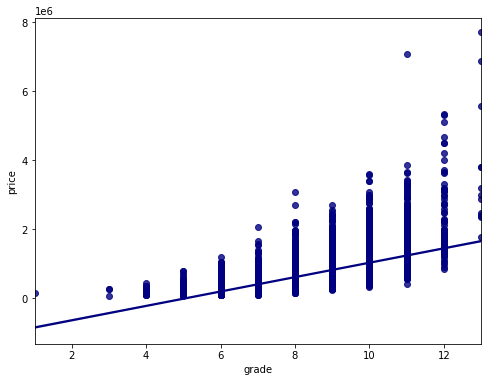

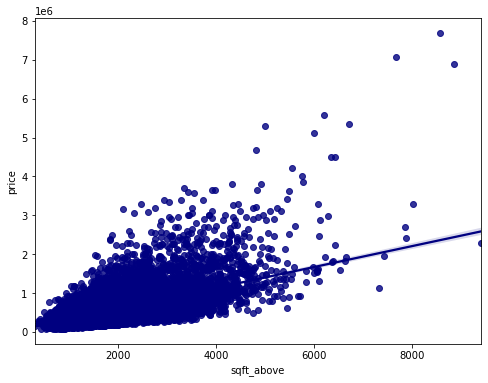

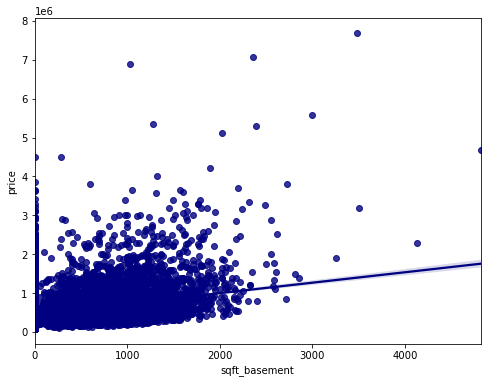

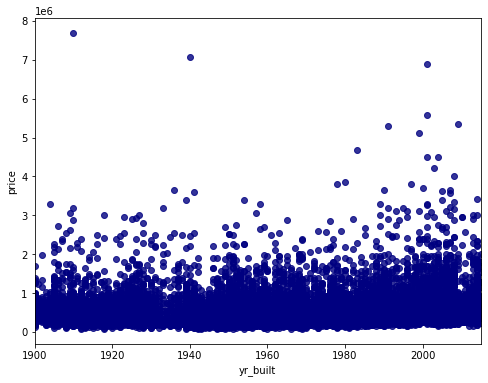

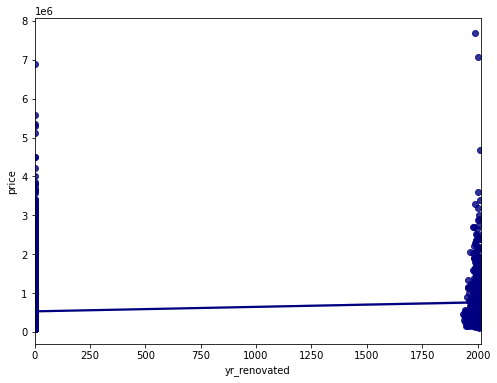

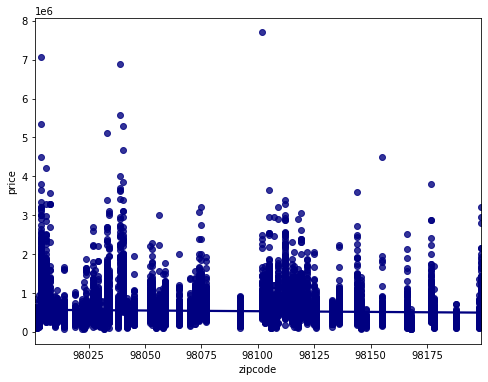

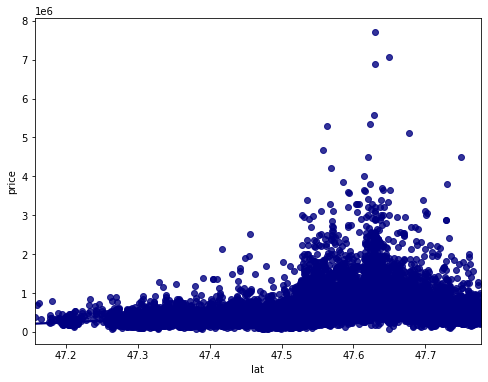

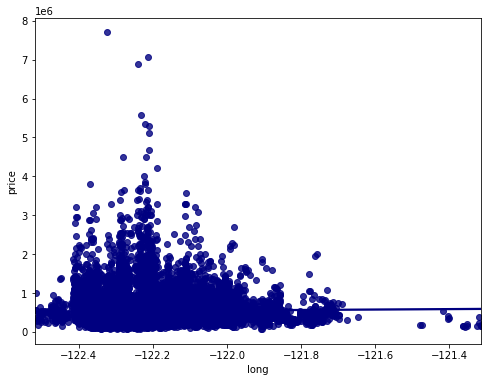

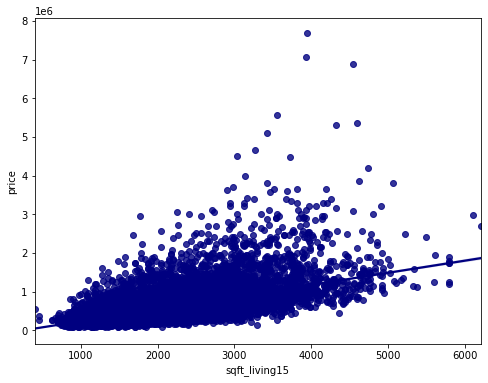

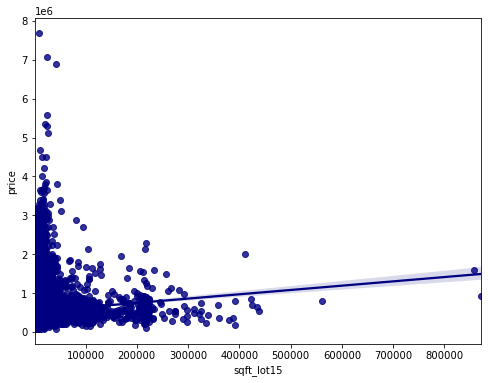

In [20]:
for i in df.columns:
    if i =='date':
        continue
    elif i=='price':
        continue
    else:
        plt.figure(figsize=(8,6))
        sns.regplot(x=df[i],y=df['price'], data=df, color='navy')

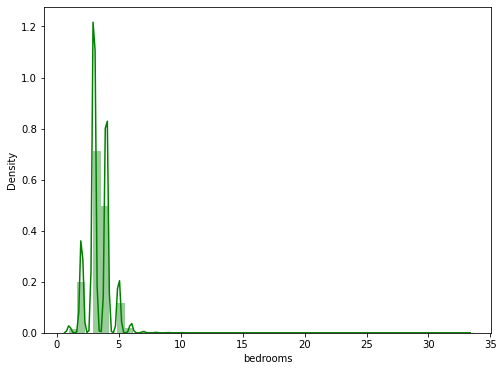

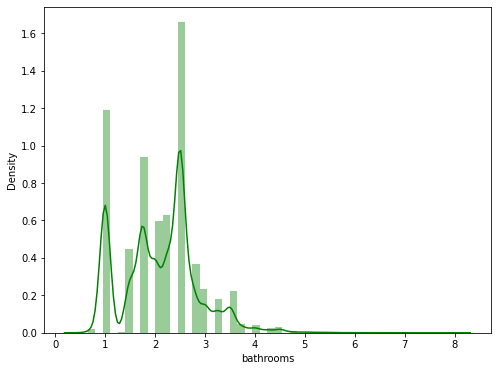

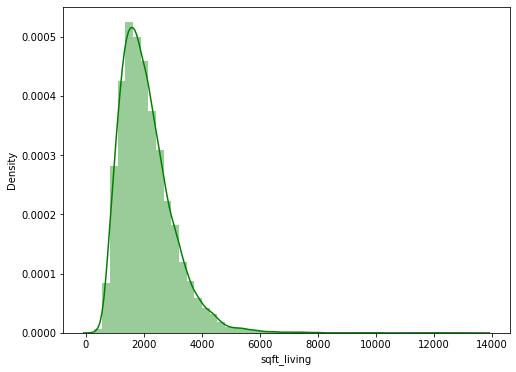

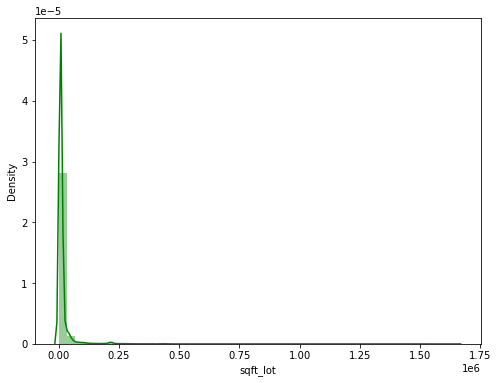

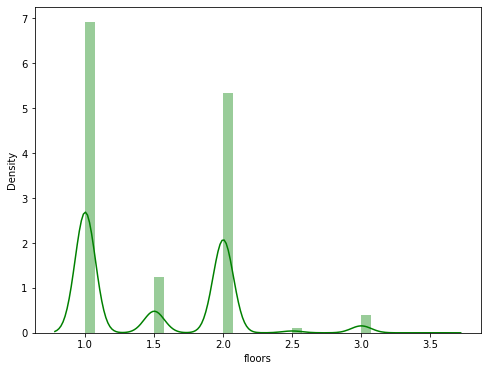

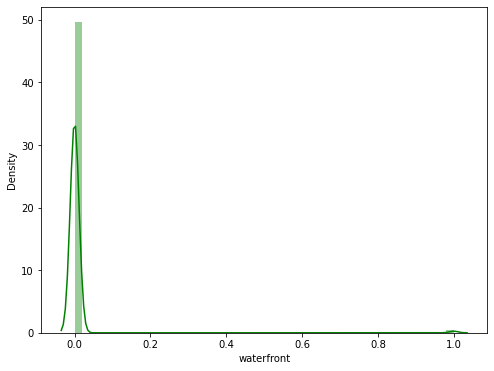

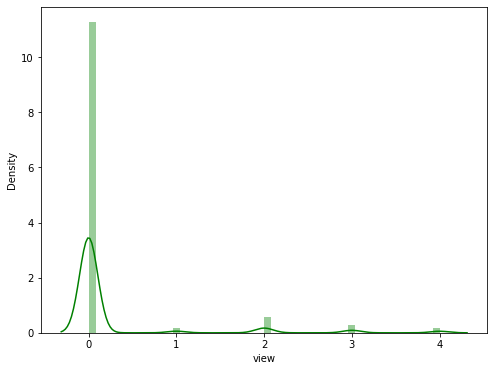

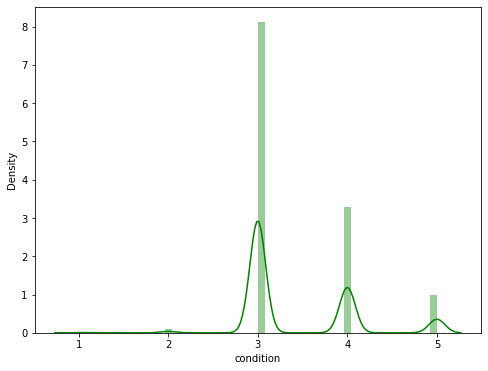

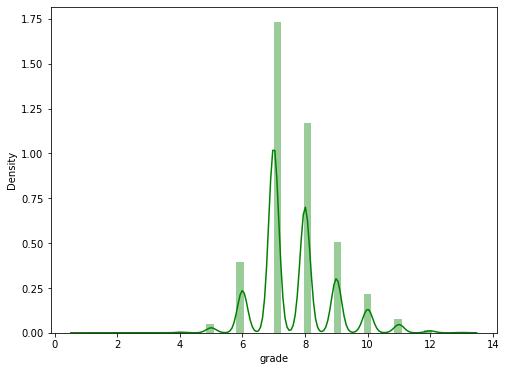

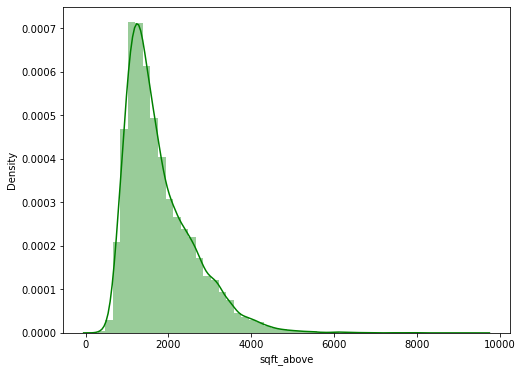

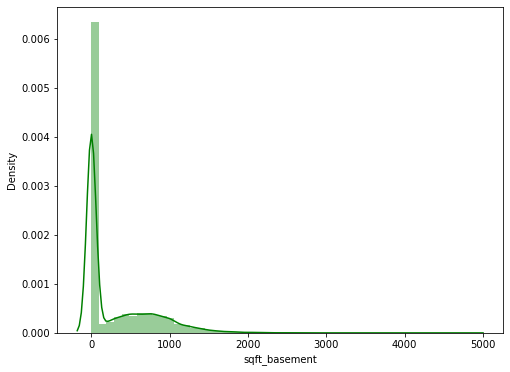

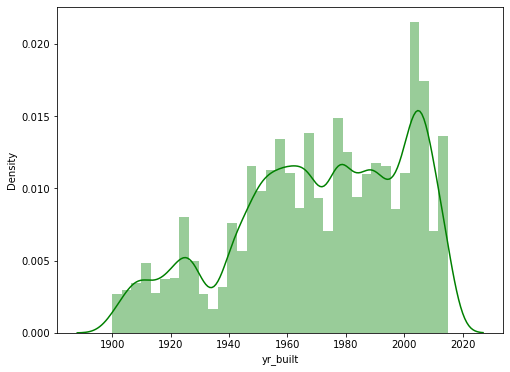

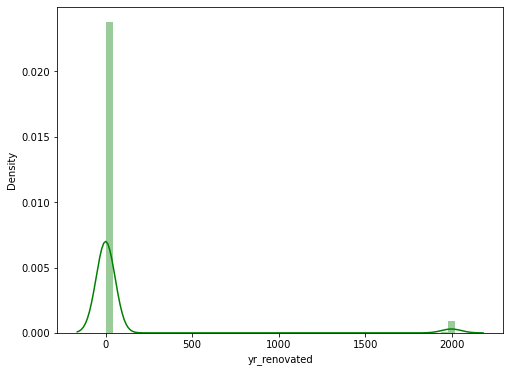

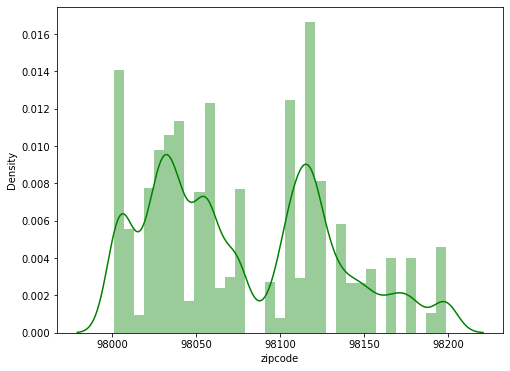

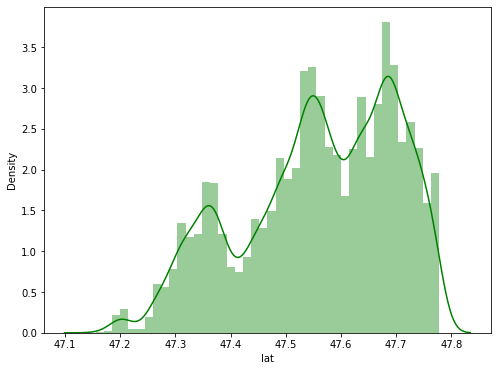

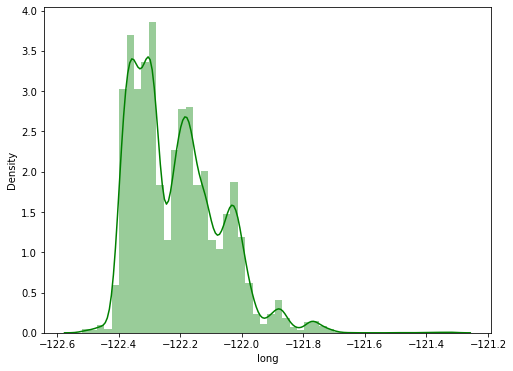

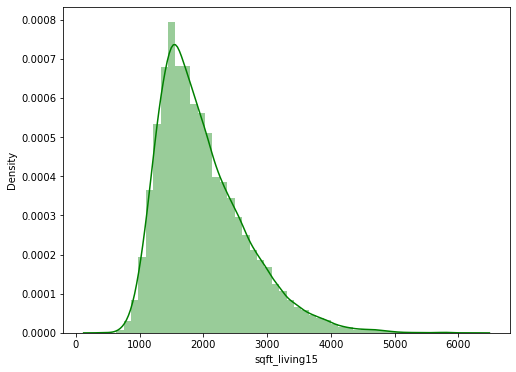

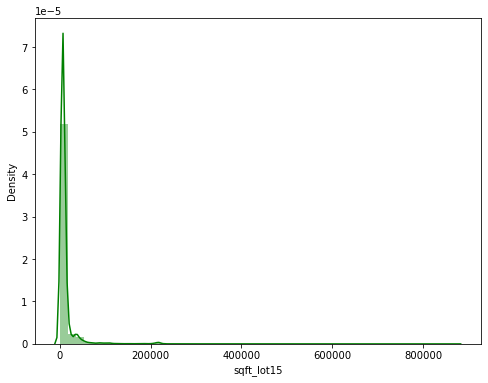

In [17]:
for i in df.select_dtypes('number').drop('price', axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.distplot(df[i], color='green')

In [11]:
for i in df.drop(['date','zipcode','waterfront','condition', 'yr_built', 'yr_renovated'], axis=1).columns:
    
    stat, p = shapiro(df[i])

    if p>0.05:
        print(f'{i} ------> Normally Distributed',(stat, p))
    else:
        print(f'{i} ------> not Normally Distributed', (stat, p))

price ------> not Normally Distributed (0.7120139598846436, 0.0)
bedrooms ------> not Normally Distributed (0.8474194407463074, 0.0)
bathrooms ------> not Normally Distributed (0.9353547096252441, 0.0)
sqft_living ------> not Normally Distributed (0.9149821400642395, 0.0)
sqft_lot ------> not Normally Distributed (0.23291927576065063, 0.0)
floors ------> not Normally Distributed (0.7506103515625, 0.0)
view ------> not Normally Distributed (0.3397040367126465, 0.0)
grade ------> not Normally Distributed (0.8952866196632385, 0.0)
sqft_above ------> not Normally Distributed (0.8936538100242615, 0.0)
sqft_basement ------> not Normally Distributed (0.7097305059432983, 0.0)
lat ------> not Normally Distributed (0.956612229347229, 0.0)
long ------> not Normally Distributed (0.9391594529151917, 0.0)
sqft_living15 ------> not Normally Distributed (0.9319114089012146, 0.0)
sqft_lot15 ------> not Normally Distributed (0.28693175315856934, 0.0)


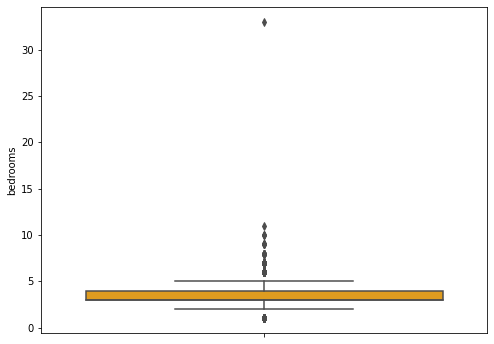

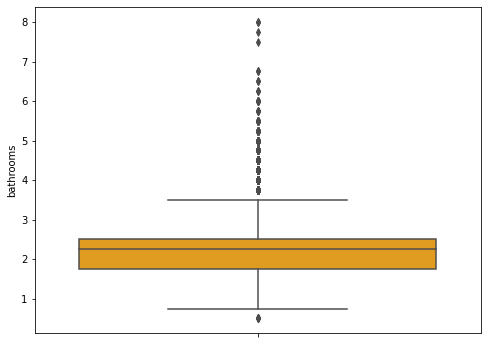

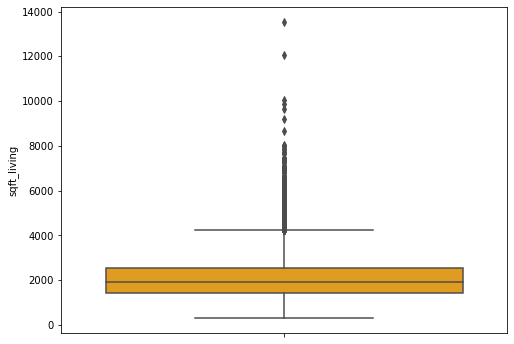

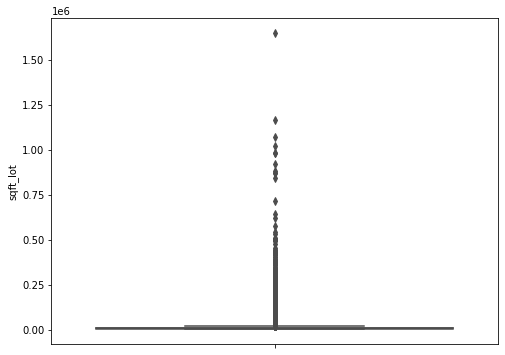

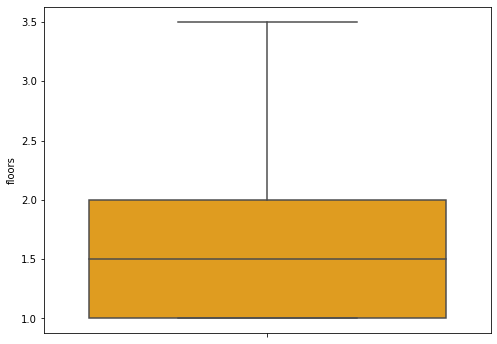

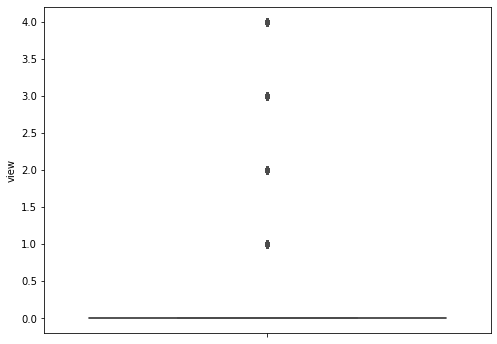

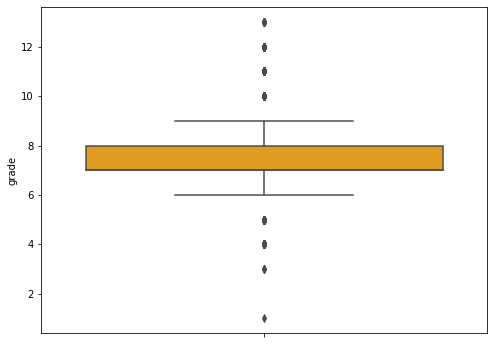

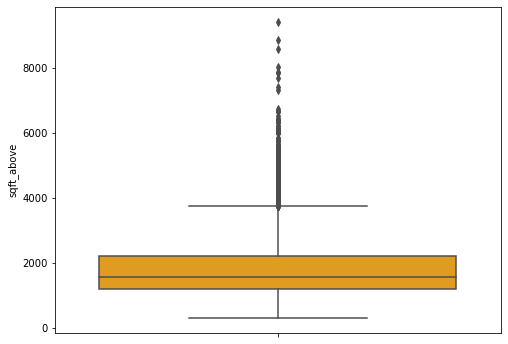

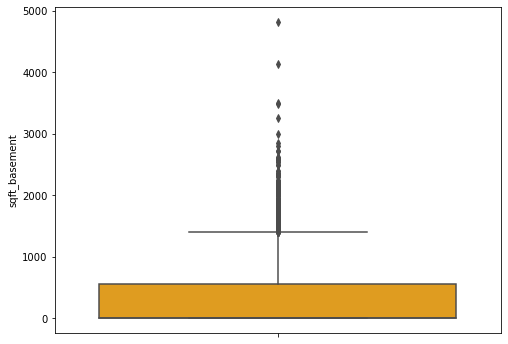

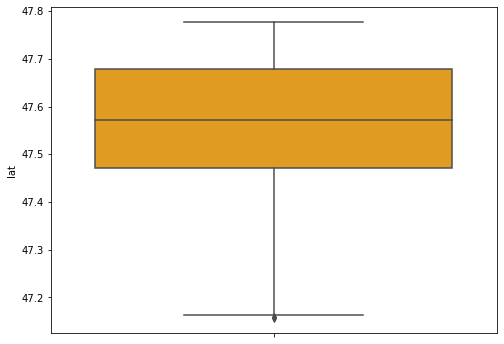

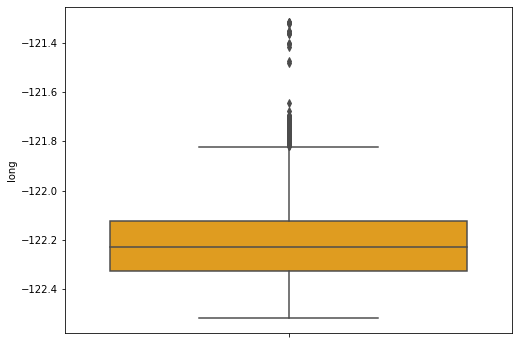

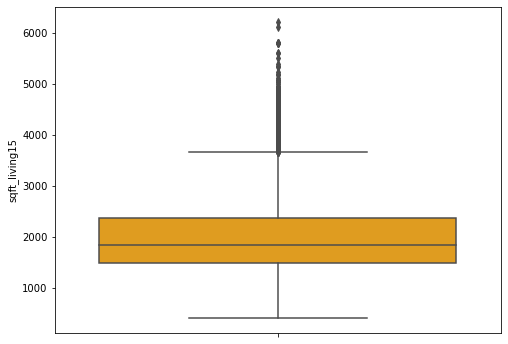

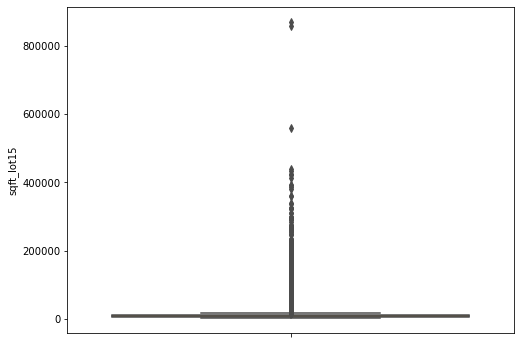

In [12]:
for i in df.drop(['price','date','zipcode','waterfront','condition', 'yr_built', 'yr_renovated'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[i], color='orange')

In [12]:
#Z SCORE
# #def outlier_func():
# for i in df.select_dtypes('number').drop('price', axis=1).columns:
#     my_list=[]
#     my_dict={}
#     for x in df[i]:
#         my_list.append((x-np.mean(df[i]))/np.std(df[i]))
#         my_dict[i]=my_list        

In [13]:
my_frame=pd.DataFrame()
for i in df.columns:
    if i=='price' or i=='date' or i=='zipcode' \
    or i=='waterfront' or i=='condition' or i=='yr_built' or i=='yr_renovated':
        my_frame['price']=df['price']
        my_frame['date']=df['date']
        my_frame['zipcode']=df['zipcode']
        my_frame['waterfront']=df['waterfront']
        my_frame['condition']=df['condition']
        my_frame['yr_built']=df['yr_built']
        my_frame['yr_renovated']=df['yr_renovated']

    else:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        diff=Q3-Q1
        upper_bound=Q3+1.5*diff
        lower_bound=Q1-1.5*diff

        list1=[]
        for x in df[i]:
            if x>=lower_bound and x<=upper_bound:
                list1.append(x)
            else:
                list1.append(np.nan)
        my_frame[i]=list1        

In [14]:
my_frame.isna().sum()

price               0
date                0
zipcode             0
waterfront          0
condition           0
yr_built            0
yr_renovated        0
bedrooms          533
bathrooms         561
sqft_living       572
sqft_lot         2425
floors              0
view             2124
grade            1911
sqft_above        611
sqft_basement     496
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64

In [15]:
len(my_frame)

21613

In [16]:
#without OUTLIERS
my_frame=my_frame.dropna()

In [17]:
df=my_frame

In [18]:
len(df)

15597

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, StandardScaler, PolynomialFeatures)

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


from sklearn.model_selection import KFold, cross_val_predict

# Multiple Linear Regression

In [20]:
emp_list=[]

for i in df['date']:
    emp_list.append(i[:8])

In [21]:
df['date']=emp_list

In [22]:
le=LabelEncoder()

In [23]:
df['date']=le.fit_transform(df['date'])
df['zipcode']=le.fit_transform(df['zipcode'])
df['yr_built']=le.fit_transform(df['yr_built'])
df['yr_renovated']=le.fit_transform(df['yr_renovated'])

## Model Building

In [24]:
X=df.drop(['price'],axis=1)

In [25]:
y=df[['price']]

In [26]:
X2_train, X2_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
label_encoded=X2_train[['date', 'zipcode', 'waterfront', 'condition', 'yr_built', 'yr_renovated']]

In [28]:
label_encoded=label_encoded.reset_index(drop=True)

In [29]:
for_standard_scaling=X2_train.drop(['date', 'zipcode', 'waterfront', 'condition', 'yr_built', 'yr_renovated'], axis=1)

In [30]:
for_standard_scaling=for_standard_scaling.reset_index(drop=True)

In [31]:
s = StandardScaler()

s.fit(for_standard_scaling)

X2_train_s = pd.DataFrame(s.transform(for_standard_scaling), columns = for_standard_scaling.columns)

In [32]:
X2_train_s=pd.concat([label_encoded, X2_train_s], axis=1)

In [33]:
X2_train_s

,date,zipcode,waterfront,condition,yr_built,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,287,51,0,3,21,0,-1.641294,-1.511047,-0.940083,-0.442525,0.040407,0.0,-1.71622,-0.586241,-0.652228,-0.248887,-0.251560,-0.551351,-0.454035
1,234,27,0,3,83,0,-0.347119,-0.357916,-0.796150,2.227252,-0.870999,0.0,-0.48618,-0.437895,-0.652228,0.704986,0.790320,-0.570892,1.004590
2,164,1,0,4,61,0,-0.347119,-1.511047,-1.451841,0.080822,-0.870999,0.0,-1.71622,-1.113693,-0.652228,-1.959747,0.171704,-1.332979,0.136060
3,275,64,0,5,52,0,-0.347119,0.026461,-0.092482,0.335718,-0.870999,0.0,0.74386,0.287351,-0.652228,1.154913,-1.130646,-0.062834,0.409843
4,301,44,0,3,107,0,-0.347119,1.563969,-0.140460,-1.739105,2.774625,0.0,0.74386,0.237902,-0.652228,0.776775,-1.293440,-0.844462,-1.889403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,321,56,0,3,109,0,-0.347119,0.795215,-0.908098,-1.799514,2.774625,0.0,-0.48618,-0.718104,-0.371291,1.041187,-0.845757,-1.196195,-1.917645
10913,206,68,0,4,53,0,0.947056,-0.357916,1.394817,-0.295186,-0.870999,0.0,0.74386,-0.240101,2.859484,0.662339,-1.325999,0.542928,-0.287905
10914,252,26,0,3,61,0,-0.347119,0.026461,-0.572256,2.798926,-0.870999,0.0,-0.48618,-0.207135,-0.652228,-1.414575,1.392657,-0.160537,2.505081
10915,194,5,0,3,61,0,-0.347119,0.410838,0.019465,0.412040,-0.870999,0.0,0.74386,-0.503827,0.892925,-0.078299,0.489152,0.601550,0.509522


In [34]:
for i in X2_train_s.drop(['date','zipcode','waterfront','condition', 'yr_built', 'yr_renovated'], axis=1).columns:
    
    stat, p = shapiro(X2_train_s[i])

    if p>0.05:
        print(f'{i} ------> Normally Distributed',(stat, p))
    else:
        print(f'{i} ------> not Normally Distributed', (stat, p))

bedrooms ------> not Normally Distributed (0.8513067960739136, 0.0)
bathrooms ------> not Normally Distributed (0.9252985715866089, 0.0)
sqft_living ------> not Normally Distributed (0.9737952351570129, 1.645783007395568e-40)
sqft_lot ------> not Normally Distributed (0.9757681488990784, 2.6571561610373614e-39)
floors ------> not Normally Distributed (0.747857928276062, 0.0)
view ------> Normally Distributed (1.0, 1.0)
grade ------> not Normally Distributed (0.8539009690284729, 0.0)
sqft_above ------> not Normally Distributed (0.9279732704162598, 0.0)
sqft_basement ------> not Normally Distributed (0.6963576674461365, 0.0)
lat ------> not Normally Distributed (0.9484412670135498, 0.0)
long ------> not Normally Distributed (0.9370041489601135, 0.0)
sqft_living15 ------> not Normally Distributed (0.9594078063964844, 0.0)
sqft_lot15 ------> not Normally Distributed (0.9854622483253479, 6.948529897082094e-32)


# Cross Validation

In [35]:
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

In [36]:
lr=LinearRegression()

In [37]:
predictions = cross_val_predict(lr, X2_train_s, y_train, cv=kf)

In [38]:
r2_score(y_train, predictions)

0.6424701848046699

In [39]:
y_train=y_train.reset_index(drop=True)

In [40]:
scores = []
index_list=[]
pred_list=[]
frame=pd.DataFrame()
for train_index, test_index in kf.split(X2_train_s):
    
    X_train,X_test=(X2_train_s.loc[train_index], X2_train_s.loc[test_index])
    y_train2, y_test2=(y_train.loc[list(X_train.index)], y_train.loc[list(X_test.index)])
    
    lr.fit(X_train, y_train2)

    y_pred = lr.predict(X_test)
    
    index_list.append(list(X_test.index))
    pred_list.append(y_pred)

    score = r2_score(y_test2.values, y_pred)
    
    scores.append(score)
    
np.mean(scores)

0.6421089131728795

In [41]:
# index_frame=pd.DataFrame(index_list).T
# list1=[]
# frame1=pd.DataFrame()

# for i in index_frame.columns:
#     for x in index_frame[i]:
#         list1.append(x)
# frame1['index']=list1

In [42]:
# frame1

In [43]:
# frame2=pd.DataFrame()
# list2=[]
# for i in pd.DataFrame(pred_list).T.columns:#[0:1][0]:
#     for x in pd.DataFrame(pred_list).T[i]:
#         for y in x:
#             list2.append(float(y))
# frame2['pred']=list2

In [44]:
# frame2

In [45]:
# s2.inverse_transform(y_train)

In [46]:
# s2.inverse_transform(predictions)

In [47]:
# for i in X2_test[['date','zipcode', 'yr_built', 'yr_renovated']].columns:    
#     X2_test[i]=pd.DataFrame(le.transform(X2_test[i]), columns=[i])

# Co-Efficients

In [48]:
lr.coef_.reshape(19,1)

array([[ 9.10459548e+01],
       [-9.56730822e+02],
       [ 7.27595761e-12],
       [ 3.05494746e+04],
       [-2.04369271e+03],
       [ 1.21899982e+03],
       [-8.38941928e+03],
       [ 1.21544667e+04],
       [ 3.59169479e+04],
       [-1.01901421e+04],
       [ 4.89430141e+03],
       [ 4.54747351e-13],
       [ 6.98845491e+04],
       [ 2.89248341e+04],
       [ 1.37946986e+04],
       [ 8.00699263e+04],
       [-6.66338373e+03],
       [ 2.57741367e+04],
       [-1.52750037e+04]])

'The plot below tells us about dependencies between a specific feature and\nthe target when all other features remain constant, i.e., conditional dependencies.'

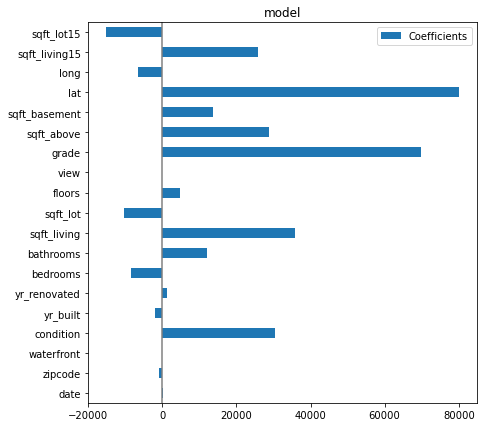

In [49]:
#https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

coefs = pd.DataFrame(
    lr.coef_.reshape(19,1),
   columns=['Coefficients'], index=X2_train_s.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


"""The plot below tells us about dependencies between a specific feature and
the target when all other features remain constant, i.e., conditional dependencies."""

# Grid Search CV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [52]:
lr=LinearRegression()

In [53]:
parameters = {'copy_X':[True, False],
              "fit_intercept": [True, False],
              'normalize':[True, False], 
             }
grid = GridSearchCV(estimator=lr, param_grid = parameters, cv = 8, n_jobs=-1,return_train_score=True)
grid.fit(X2_train_s, y_train)

GridSearchCV(cv=8, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             return_train_score=True)

In [54]:
grid.best_estimator_

LinearRegression()

In [55]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [56]:
grid.best_score_

0.6419515180181805

In [57]:
lr2=LinearRegression(copy_X=True, normalize=True, fit_intercept=True)

## Recursive Feature Elimination

In [58]:
from sklearn.feature_selection import RFE

In [59]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1)

In [60]:
rfe.fit(X2_train_s, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [61]:
rfe.ranking_

array([17, 16, 18,  4, 13, 14, 12,  9,  1, 11, 10, 19,  3,  7,  8,  2, 15,
        5,  6])

In [62]:
# pd.concat([X2_train_s, y_train], axis=1).corr()

In [63]:
from operator import itemgetter
features = X2_train_s.columns.to_list()
for x, y in (zip(rfe.ranking_ , features)):#, key=itemgetter(0))):
    print(x, y)

17 date
16 zipcode
18 waterfront
4 condition
13 yr_built
14 yr_renovated
12 bedrooms
9 bathrooms
1 sqft_living
11 sqft_lot
10 floors
19 view
3 grade
7 sqft_above
8 sqft_basement
2 lat
15 long
5 sqft_living15
6 sqft_lot15


In [64]:
n_features_to_select = 17
rfe = RFE(estimator=lr2, n_features_to_select=n_features_to_select)
rfe.fit(X2_train_s, y_train)

RFE(estimator=LinearRegression(normalize=True), n_features_to_select=17)

In [65]:
rfe.score(X2_train_s, y_train)

0.6436538131416661

# Test set

In [66]:
X2_test=X2_test.reset_index(drop=True)

In [67]:
for_standard_scaling2=X2_test.drop(['date', 'zipcode', 'waterfront', 'condition', 'yr_built', 'yr_renovated'], axis=1)

In [68]:
X2_test_s = pd.DataFrame(s.transform(for_standard_scaling2), columns = for_standard_scaling2.columns)
#y_test = pd.DataFrame(s2.transform(y_test), columns = y_test.columns)

In [69]:
X2_test_s=pd.concat([X2_test[['date','zipcode', 'waterfront','condition','yr_built','yr_renovated']],X2_test_s], axis=1)

In [70]:
rfe.score(X2_test_s, y_test)

0.6474471095671261

In [71]:
y_pred_mlr=rfe.predict(X2_test_s)

# R2

In [72]:
r2_score(y_test, y_pred_mlr)

0.6474471095671261

# RMSE

In [73]:
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_mlr))
RMSE

119970.78616709141

# Polynomial Regression

In [74]:
pf = PolynomialFeatures(degree=3, include_bias=False)

In [75]:
X_pf = pf.fit_transform(X2_train_s)
X2_train_s2=pd.DataFrame(X_pf)

In [76]:
lasso=Lasso()
ridge=Ridge()
elasticnet=ElasticNet()

In [83]:
frame=pd.DataFrame()
for model in [lr, lasso, ridge, elasticnet]:

    scores = []
    index_list=[]
    pred_list=[]

    for train_index, test_index in kf.split(X2_train_s2):

        X_train,X_test=(X2_train_s2.loc[train_index], X2_train_s2.loc[test_index])
        y_train2, y_test2=(y_train.loc[list(X_train.index)], y_train.loc[list(X_test.index)])


        model.fit(X_train, y_train2)

        y_pred = model.predict(X_test)

        index_list.append(list(X_test.index))
        pred_list.append(y_pred)

        score = r2_score(y_test2.values, y_pred)

        scores.append(score)
    #print(model)
    print(model, np.mean(scores))

LinearRegression() 0.7315132861214012
Lasso() 0.7579647775702373
Ridge() 0.7338575559521942
ElasticNet() 0.7636307565703728


In [94]:
parameters_ridge = {'copy_X':[True, False],
              "fit_intercept": [True, False],
              'normalize':[True, False], 
              'alpha':[0.05, 0.1, 0.3, 1, 3, 5]
             }

parameters_lasso=  {'copy_X':[True, False],
              "fit_intercept": [True, False],
              'normalize':[True, False], 
              'alpha':[0.05, 0.1, 0.3, 1, 3, 5]
             }

parameters_elasticnet= {'copy_X':[True, False],
              "fit_intercept": [True, False],
              'normalize':[True, False], 
              'alpha':[0.05, 0.1, 0.3, 1, 3, 5],
            'l1_ratio':list(np.linspace(0.1, 0.9, 9))
             }

parameters_linear = {'copy_X':[True, False],
              "fit_intercept": [True, False],
              'normalize':[True, False], 
             }

In [1]:
for i in [lr, lasso, ridge, elasticnet]:
    
    if i == lr:
        grid = GridSearchCV(estimator=lr, param_grid = parameters_linear, cv = 8, n_jobs=-1,return_train_score=True)
        grid.fit(X2_train_s2, y_train)
        print(i)
        print(grid.best_params_)
        print(grid.best_score_)
        
    elif i==lasso:
        grid = GridSearchCV(estimator=lasso, param_grid = parameters_lasso, cv = 8, n_jobs=-1,return_train_score=True)
        grid.fit(X2_train_s2, y_train)
        print(i)
        print(grid.best_params_)
        print(grid.best_score_)
        
    elif i==ridge:
        grid = GridSearchCV(estimator=ridge, param_grid = parameters_ridge, cv = 8, n_jobs=-1,return_train_score=True)
        grid.fit(X2_train_s2, y_train)
        print(i)
        print(grid.best_params_)
        print(grid.best_score_)
    
    else:
        grid = GridSearchCV(estimator=elasticnet, param_grid = parameters_elasticnet, cv = 8, n_jobs=-1,return_train_score=True)
        grid.fit(X2_train_s2, y_train)
        print(i)
        print(grid.best_params_)
        print(grid.best_score_)


In [77]:
X_pf2 = pf.fit_transform(X2_test_s)
X2_test_s2=pd.DataFrame(X_pf2)

# Lasso Regression

In [78]:
from sklearn.linear_model import Lasso

In [79]:
lasso=Lasso(alpha=3, copy_X=True, fit_intercept=True, normalize=True)

In [80]:
lasso.fit(X2_train_s2, y_train)
y_pred_lasso = lasso.predict(X2_test_s2)

In [81]:
lasso.score(X2_train_s2, y_train)

0.825438108330562

In [82]:
lasso.score(X2_test_s2, y_test)

0.8035933141068462

In [83]:
r2_score(y_test, y_pred_lasso)

0.8035933141068462

In [84]:
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_lasso))
RMSE

89545.03256856969

# Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge=Ridge(alpha =0.05, copy_X= True, fit_intercept=True, normalize=True)

In [89]:
ridge.fit(X2_train_s2, y_train)
y_pred_ridge = ridge.predict(X2_test_s2)

In [90]:
ridge.score(X2_train_s2, y_train)

0.8162133784549808

In [91]:
ridge.score(X2_test_s2, y_test)

0.7839770860591899

In [92]:
r2_score(y_test, y_pred_ridge)

0.7839770860591899

In [93]:
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE

93910.31017481996

# Elastic Net Regression

In [133]:
elasticnet.fit(X2_train_s2, y_train)
y_pred_ridge = elasticnet.predict(X2_test_s2)

In [134]:
elasticnet.score(X2_train_s2, y_train)

0.824359905344023

In [135]:
elasticnet.score(X2_test_s2, y_test)

0.7731093687501246

In [136]:
r2_score(y_test, y_pred_ridge)

0.7731093687501246

In [137]:
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE

96243.55284592316